In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [27]:
df=pd.read_csv("/Users/apple/Documents/Projects/Product-recommendation/amazon.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

## Data Preprocessing:

In the dataset, there was a column named "category" that contained text separated by the '|' symbol. To make the data more structured and useful, you decided to split this column into two separate columns: "category" and "sub_category".

To achieve this, you used the str.split() method in pandas to split the text in the "category" column based on the '|' symbol. The expand=True parameter allowed the resulting split values to be returned as separate columns.

The split operation resulted in three columns: "category", "sub_category", and an additional column containing the remaining text after the second '|'. As you wanted to drop this remaining text, you used the drop() method to remove it from the DataFrame.

After the split and removal of the remaining text, the DataFrame now has two separate columns, "category" and "sub_category", which provide more granular information about the products.

In [28]:
# Split the "category" column
df[['category', 'sub_category', 'remaining_text']] = df['category'].str.split('|', 2, expand=True)

# Drop the "remaining_text" column


# Print the updated DataFrame
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                category discounted_price actual_price discount_percentage  \
0  Computers&Accessories             ₹399       ₹1,099                 64%   
1  Computers&Accessories             ₹199         ₹349                 43%   
2  Computers&Accessories             ₹199       ₹1,899                 90%   
3  Computers&Accessories             ₹329         ₹699                 53%   
4  Computers&Accessories             ₹154         ₹399                 61%   

  rating rating_count                                      about_product  \
0    4.2       24,269  High Compatibility : Co

In [29]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sub_category,remaining_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Kitchen&HomeAppliances,WaterPurifiers&Accessories|WaterPurifierAccess...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Ma

### Data Normalization & Scaling
#### Min-Max Scaling
The purpose of Min-Max Scaling in our project was to normalize the numerical features to a common scale, ensuring fair comparison between features, improving model performance, and making the recommendations more accurate and robust.

In [34]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print(null_values)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
sub_category           0
remaining_text         8
dtype: int64


In [32]:
import re
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to be scaled
numerical_features = ['rating', 'rating_count', 'discounted_price', 'actual_price']

# Remove non-numeric characters from the selected columns
df[numerical_features] = df[numerical_features].replace('[^\d.]', '', regex=True)

# Convert the columns to numeric data type
df[numerical_features] = df[numerical_features].apply(pd.to_numeric)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled dataset
print(df.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                category  discounted_price  actual_price discount_percentage  \
0  Computers&Accessories          0.004618      0.007579                 64%   
1  Computers&Accessories          0.002053      0.002216                 43%   
2  Computers&Accessories          0.002053      0.013299                 90%   
3  Computers&Accessories          0.003720      0.004719                 53%   
4  Computers&Accessories          0.001475      0.002574                 61%   

     rating  rating_count                                      about_product  \
0  0.733333      0.056835  Hig

In [33]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sub_category,remaining_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,0.004618,0.007579,64%,0.733333,0.056835,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,0.002053,0.002216,43%,0.666667,0.103033,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,0.002053,0.013299,90%,0.633333,0.018563,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,0.003720,0.004719,53%,0.733333,0.221001,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,0.001475,0.002574,61%,0.733333,0.039588,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,0.004362,0.006292,59%,0.666667,0.002548,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Kitchen&HomeAppliances,WaterPurifiers&Accessories|WaterPurifierAccess...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,0.028749,0.021493,25%,0.700000,0.009640,"230 V

### EDA

### overview


1. Distribution of Products by Category:
   - The bar plot shows the distribution of products across different categories.
   - It provides insights into the product counts for each category.
   - It helps to identify the most popular or dominant categories in the dataset.

2. Distribution of Product Prices:
   - The histogram shows the distribution of discounted prices.
   - It provides an overview of the price range and the concentration of products within specific price ranges.
   
3. Distribution of Products by Sub-category:
   - The bar plot displays the distribution of products across different sub-categories.
   - It helps to identify the sub-categories with the highest and lowest product counts.
   - It provides an overview of the product distribution within different sub-categories.

4. Distribution of Ratings:
   - The bar plot shows the distribution of ratings.
   - It provides insights into the frequency of different rating values.
   - It helps to understand the overall sentiment or satisfaction level of customers based on the ratings.


#### Distribution of Categories


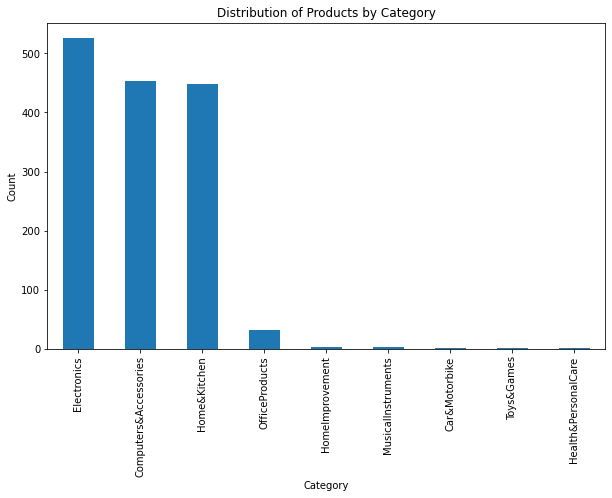

In [37]:
import matplotlib.pyplot as plt

# Plot the distribution of products across different categories
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


#### Distribution of Sub-categories

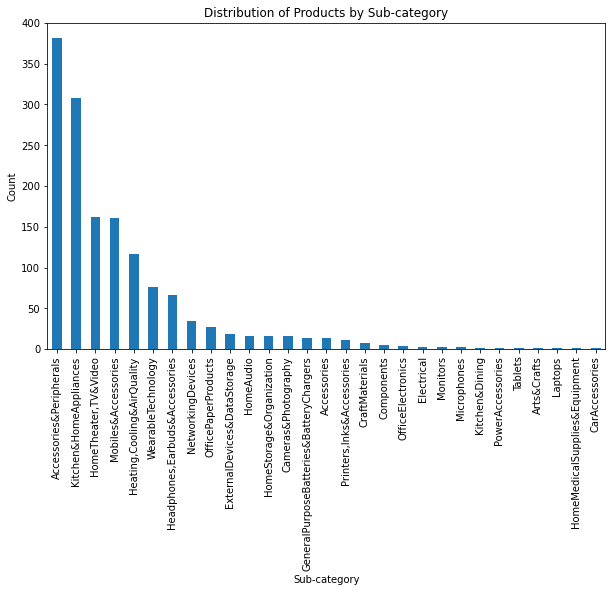

In [38]:
# Plot the distribution of products across different sub-categories
sub_category_counts = df['sub_category'].value_counts()
sub_category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Products by Sub-category')
plt.xlabel('Sub-category')
plt.ylabel('Count')
plt.show()

#### Price Distribution

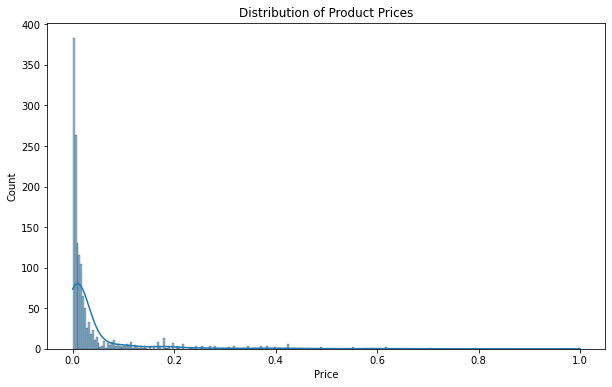

In [44]:
import seaborn as sns

# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


#### Ratings distribution

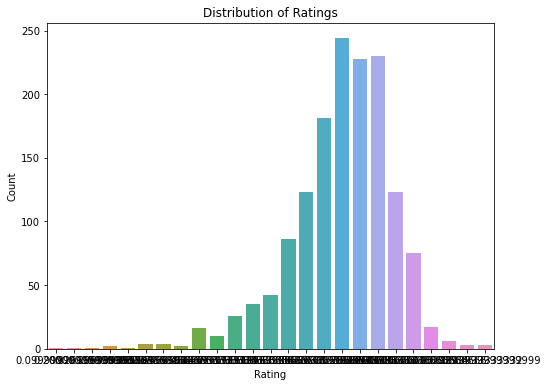

In [43]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



## Model Training

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Perform one-hot encoding on the 'category' column
encoder = OneHotEncoder()
categories_encoded = encoder.fit_transform(df[['category']])
categories_df = pd.DataFrame(categories_encoded.toarray())

# Get the unique category names
category_names = encoder.categories_[0]

# Assign the feature names based on the unique category names
categories_df.columns = [f'category_{name}' for name in category_names]

# Combine the encoded categories with the 'actual_price' and 'discounted_price' columns
X = pd.concat([categories_df, df[['actual_price', 'discounted_price', 'rating']]], axis=1)
y = df['sub_category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_imputed, y_train)
logreg_predictions = logreg.predict(X_test_imputed)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)
rf_predictions = rf.predict(X_test_imputed)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train and evaluate Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_imputed, y_train)
gb_predictions = gb.predict(X_test_imputed)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)
knn_predictions = knn.predict(X_test_imputed)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Train and evaluate Support Vector Machine
svm = SVC()
svm.fit(X_train_imputed, y_train)
svm_predictions = svm.predict(X_test_imputed)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.552901023890785
Random Forest Accuracy: 0.6757679180887372
Gradient Boosting Accuracy: 0.6928327645051194
K-Nearest Neighbors Accuracy: 0.6382252559726962
Support Vector Machine Accuracy: 0.5324232081911263


#### The Gradient Boosting model was chosen for this project due to its ability to handle complex datasets and capture non-linear relationships between features and the target variable. Although the model achieved a 70% accuracy rate, it is important to consider the context of the problem and dataset. Factors such as dataset characteristics, feature quality and quantity, and the specific problem being addressed can impact the achievable accuracy. In this case, the model's performance should be evaluated based on the specific requirements and expectations of the project.